# Anti Cheat

## Add libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

from pandas_profiling import ProfileReport

%matplotlib inline

## Load data

In [3]:
data = pd.read_excel('predictors.xlsx')
target = pd.read_excel('target.xlsx')                       

## Describe data

In [8]:
data.head().T

,0,1,2,3,4
IDATE,01-FEB-18,01-FEB-18,01-FEB-18,01-FEB-18,01-FEB-18
USER_ID,1350,2609,3504,5208,5691
ISWALLETUSER,1,1,1,1,1
PAY_CNT_ALL_40D,8,1,3,5,4
PAY_CNT_MOB_40D,1,0,0,2,0
PAY_SUM_ALL_40D,10394,50,46834,21521,73000
PAY_SUM_MOB_40D,200,0,0,2700,0
MOB_NUMB_UNIQ_PAY_CNT_40D,1,0,0,2,0
SPEND_BONUS_SUM_40D,158,10,1414,0,0
SPEND_BONUS_PRC_40D,7,20,2,0,0


In [5]:
target.head()

,USER_ID,PHONE,IS_WALLET_USER,IDATE
0,3033836.0,7072869756,1.0,01-FEB-18 12.00.00.000000000 AM
1,3556523.0,7021820541,1.0,01-FEB-18 12.00.00.000000000 AM
2,3580533.0,7076196504,1.0,01-FEB-18 12.00.00.000000000 AM
3,1930515.0,7785056016,1.0,01-FEB-18 12.00.00.000000000 AM
4,2904966.0,7076797683,1.0,01-FEB-18 12.00.00.000000000 AM


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233390 entries, 0 to 233389
Data columns (total 23 columns):
IDATE                        233390 non-null object
USER_ID                      233390 non-null int64
ISWALLETUSER                 233390 non-null int64
PAY_CNT_ALL_40D              233390 non-null int64
PAY_CNT_MOB_40D              233390 non-null int64
PAY_SUM_ALL_40D              233390 non-null int64
PAY_SUM_MOB_40D              233390 non-null int64
MOB_NUMB_UNIQ_PAY_CNT_40D    233390 non-null int64
SPEND_BONUS_SUM_40D          233390 non-null int64
SPEND_BONUS_PRC_40D          233390 non-null int64
MAX_PAY_SUM_40D              233390 non-null float64
ALL_NUM_CNT_PAY_40D          233390 non-null int64
MAX_PAY_TO_1MOB_CNT_40D      233390 non-null int64
MAX_PAY_SUM_MOB_40D          233390 non-null float64
DEVICE_CNT_40D               233390 non-null int64
UNIQ_CL_CNT_TO_DEVICE_40D    233390 non-null int64
IS_FIO_CORRECT               233390 non-null int64
PAY_CNT_IN_REGDAY

In [7]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13079 entries, 0 to 13078
Data columns (total 4 columns):
USER_ID           12833 non-null float64
PHONE             13079 non-null int64
IS_WALLET_USER    12833 non-null float64
IDATE             13079 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 408.8+ KB


## Cleaning data

In [17]:
regday_data = ['PAY_CNT_IN_REGDAY', 'PAY_CNT_MOB_IN_REGDAY', 
               'PAY_CNT_IN_REGDAY_24H', 'PAY_CNT_MOB_IN_REGDAY_24H', 
               'PAY_CNT_IN_REGDAY_48H', 'PAY_CNT_MOB_IN_REGDAY_48H']

In [ ]:
data['IDATE'] = pd.to_datetime(data['IDATE'])

In [23]:
data['IDATE'][:5]

0   2018-02-01
1   2018-02-01
2   2018-02-01
3   2018-02-01
4   2018-02-01
Name: IDATE, dtype: datetime64[ns]

In [24]:
target.drop(['IDATE', 'IS_WALLET_USER'], axis = 1, inplace = True)

,0,1,2,3,4
USER_ID,3.033836e+06,3.556523e+06,3.580533e+06,1.930515e+06,2.904966e+06
PHONE,7.072870e+09,7.021821e+09,7.076197e+09,7.785056e+09,7.076798e+09


In [25]:
target.head()

,USER_ID,PHONE
0,3033836.0,7072869756
1,3556523.0,7021820541
2,3580533.0,7076196504
3,1930515.0,7785056016
4,2904966.0,7076797683


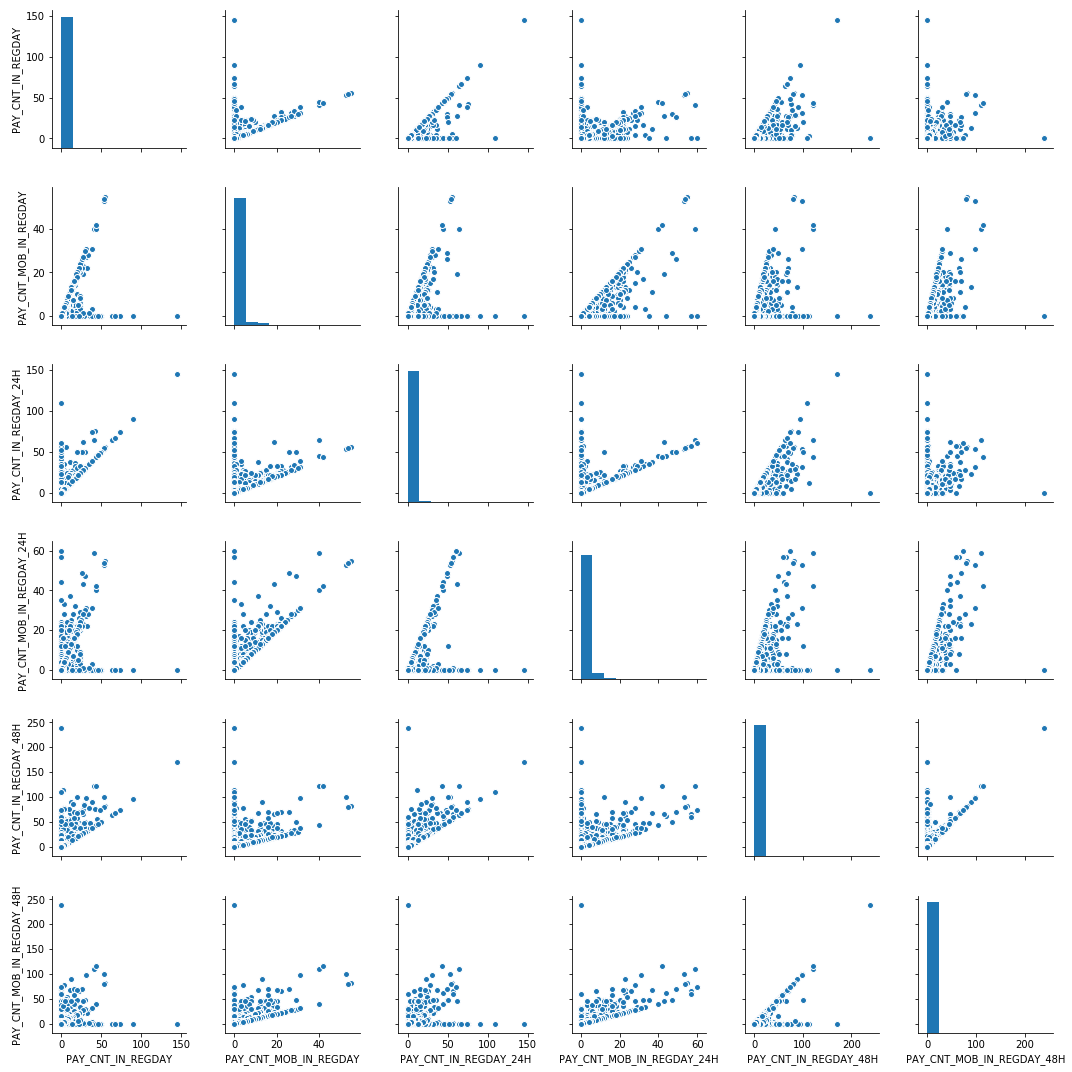

In [19]:
sns.pairplot(data[regday_data])

In [33]:
target.dropna(subset = ['USER_ID'], axis = 'rows', how = 'all', inplace = True)
target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12833 entries, 0 to 13078
Data columns (total 2 columns):
USER_ID    12833 non-null float64
PHONE      12833 non-null int64
dtypes: float64(1), int64(1)
memory usage: 300.8 KB


In [34]:
target.drop('PHONE', axis = 1, inplace = True)

In [36]:
target.head()

,USER_ID
0,3033836.0
1,3556523.0
2,3580533.0
3,1930515.0
4,2904966.0


In [38]:
target['USER_ID'] = target.USER_ID.astype(int)

In [40]:
target['USER_ID'].head()

0    3033836
1    3556523
2    3580533
3    1930515
4    2904966
Name: USER_ID, dtype: int64

In [42]:
target = pd.Series(target)
type(target)

pandas.core.series.Series

In [39]:
data['USER_ID'][:5]

0    1350
1    2609
2    3504
3    5208
4    5691
Name: USER_ID, dtype: int64

## Plan to find cheaters

$Analysis$
1. Просмотреть платежную сумму за 40дней

    1.1 Посчитать сколько заплатил через "мобильное приложение"
    
    1.2 Как часто он платит через "мобильное приложение" и как периодично

2. Просмотреть сколько потратил суммарно бонусов за 40дней

    2.1 Посчитать сколько потратил бонусных денег.

3. Анализировать MAX_PAY_SUM_MOB
    
    3.1 Просмотреть зависимость, сколько платежей он делает за период
    
    3.2 Посчитать, если он тратит все деньги за раз через какой-та сервис и добавок к этому все бонусы. То тут большая вероятность на машенничество.

$Outliers$
1. Количество MOB_NUM_UNIQ_PAY
   
   1.1 Просмотреть на оплачиваемость через какой-нибудь номер(проверка на взлом)
2. Количество используемого телефона UNIQ_CLIENT_CNT_TO_DEVICE
   
   2.1 Есть веорятность то-что используется один телефон на разных номерах. (вероятность взлома или машенник)

## Build model

In [48]:
## get aim feutures
features = set(['PAY_CNT_IN_REGDAY', 'PAY_CNT_MOB_IN_REGDAY', 
            'PAY_CNT_IN_REGDAY_24H', 'PAY_CNT_MOB_IN_REGDAY_24H', 
            'PAY_CNT_IN_REGDAY_48H', 'PAY_CNT_MOB_IN_REGDAY_48H',
            'PAY_SUM_ALL_40D', 'PAY_CNT_ALL_40D', 'PAY_SUM_MOB_40D'
            'SPEND_BONUS_SUM_40D', 'SPEND_BONUS_PRC_40D',
            'MAX_PAY_SUM_MOB_40D', 'MAX_PAY_SUM_40D'
           ])
drop_features = [col for col in data.columns.values() if not in features]

SyntaxError: invalid syntax (<ipython-input-48-110832fc86c0>, line 9)

In [ ]:
drop_features

In [47]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

In [ ]:
data = data.drop()